# BigQuery Geotab intersection congestion
https://www.kaggle.com/c/bigquery-geotab-intersection-congestion/overview


The main objective of this kaggle project is to predict wait times at major city intersections

In this notebook, we will explore the data sets provided by BigQuery

In [35]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

In [36]:
# Inputs
DS_FP = 'C:/Users/xx/Documents/Learning/Kaggle/BigQuery Geotab Intersection Congestion/0. Data/'

## Import data sets 

In [37]:
# train and test file name
dsn_train = 'train.csv'
dsn_test = 'test.csv'

# read train and testing data sets
ds_train = pd.read_csv(DS_FP + dsn_train)
ds_test = pd.read_csv(DS_FP + dsn_test)

In [38]:
# columns
ds_train.columns

Index(['RowId', 'IntersectionId', 'Latitude', 'Longitude', 'EntryStreetName',
       'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Hour', 'Weekend',
       'Month', 'Path', 'TotalTimeStopped_p20', 'TotalTimeStopped_p40',
       'TotalTimeStopped_p50', 'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
       'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40',
       'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60',
       'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80', 'City'],
      dtype='object')

In [39]:
# descriptive stats
ds_train.describe()

,RowId,IntersectionId,Latitude,Longitude,Hour,Weekend,Month,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80
count,8.563870e+05,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.00000,856387.000000
mean,2.349550e+06,833.283384,39.618965,-77.916488,12.431234,0.277880,9.104808,1.755596,5.403592,7.722655,11.925195,22.948621,3.181096,9.162174,12.722165,18.926085,34.201656,6.765856,20.285128,28.837113,44.27231,83.991313
std,2.472178e+05,654.308913,2.935437,5.952959,6.071843,0.447954,1.991094,7.146549,12.981674,15.685910,19.761325,28.274091,11.835994,20.446568,24.219271,29.851797,41.130668,29.535968,59.202108,75.217343,102.03225,160.709797
min,1.921357e+06,0.000000,33.649973,-87.862288,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2.135454e+06,291.000000,39.936739,-84.387607,8.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2.349550e+06,679.000000,39.982974,-75.175055,13.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.00000,60.400000
75%,2.563646e+06,1264.000000,41.910047,-75.100495,17.000000,1.000000,11.000000,0.000000,0.000000,10.000000,18.000000,34.000000,0.000000,0.000000,22.000000,31.000000,49.000000,0.000000,0.000000,53.100000,64.20000,85.950000
max,2.777743e+06,2875.000000,42.381782,-71.025550,23.000000,1.000000,12.000000,298.000000,375.000000,375.000000,377.000000,763.000000,337.000000,356.000000,356.000000,357.000000,359.000000,1901.900000,2844.400000,2851.100000,3282.40000,4079.200000


Based on the stats <br>
the max number for Total Time stopped is 763,Time from first stop = 359, Distance to first stop = 4079 <br>
-Time unit should be second <br>
-Distance unit should be meter


In [40]:
# total number of data 
ds_train.shape

(856387, 28)

In [41]:
# total number of test data (test data > train data)
ds_test.shape

(1921357, 13)

## Data sets definition
Definition
- Total time stopped = the amount of time spent at 0 speed
- Time from first stop = time from the first stop until the vehicle passes through the intersection
- Distance to first stop = the distance from the center of the intersection to the first stop, to give an idea of queue length

Facts
- p = percentile
- p50 = median 
- eg: Total time stopped, p20 = 0 , p40 = 0, p50 = 0, p60 = 0, p80 = 13
- Cars that drive through the intersection, the first 60% of cars didn't wait at all, and the cars happened to fall at the 80th percentile waited 13 seconds

In [42]:
# show all columns
pd.set_option('display.max_columns', None)

# show the last 5 data sets
ds_train.tail(5)

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
856382,2777739,1990,39.938232,-75.14993,South 4th Street,Catharine Street,S,W,17,1,12,South 4th Street_S_Catharine Street_W,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,75.5,Philadelphia
856383,2777740,1990,39.938232,-75.14993,South 4th Street,South 4th Street,S,S,18,1,12,South 4th Street_S_South 4th Street_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia
856384,2777741,1990,39.938232,-75.14993,South 4th Street,South 4th Street,S,S,19,1,12,South 4th Street_S_South 4th Street_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia
856385,2777742,1990,39.938232,-75.14993,Catharine Street,Catharine Street,W,W,20,1,12,Catharine Street_W_Catharine Street_W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia
856386,2777743,1990,39.938232,-75.14993,South 4th Street,South 4th Street,S,S,23,1,12,South 4th Street_S_South 4th Street_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia


In [43]:
# test data
ds_test.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,City
0,0,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,0,0,6,Peachtree Street Southwest_NE_Peachtree Street...,Atlanta
1,1,1,33.75094,-84.393032,Peachtree Street Southwest,Mitchell Street Southwest,SW,SE,0,0,6,Peachtree Street Southwest_SW_Mitchell Street ...,Atlanta
2,2,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,0,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta
3,3,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,1,0,6,Peachtree Street Southwest_NE_Peachtree Street...,Atlanta
4,4,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,1,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta


# Data quality check

In [44]:
# check null values
# training data null values count
ds_train.isnull().sum()

RowId                         0
IntersectionId                0
Latitude                      0
Longitude                     0
EntryStreetName            8148
ExitStreetName             6287
EntryHeading                  0
ExitHeading                   0
Hour                          0
Weekend                       0
Month                         0
Path                          0
TotalTimeStopped_p20          0
TotalTimeStopped_p40          0
TotalTimeStopped_p50          0
TotalTimeStopped_p60          0
TotalTimeStopped_p80          0
TimeFromFirstStop_p20         0
TimeFromFirstStop_p40         0
TimeFromFirstStop_p50         0
TimeFromFirstStop_p60         0
TimeFromFirstStop_p80         0
DistanceToFirstStop_p20       0
DistanceToFirstStop_p40       0
DistanceToFirstStop_p50       0
DistanceToFirstStop_p60       0
DistanceToFirstStop_p80       0
City                          0
dtype: int64

In [45]:
# test data null value count
ds_test.isnull().sum()

RowId                  0
IntersectionId         0
Latitude               0
Longitude              0
EntryStreetName    19198
ExitStreetName     15587
EntryHeading           0
ExitHeading            0
Hour                   0
Weekend                0
Month                  0
Path                   0
City                   0
dtype: int64

,Month,train cnts,test cnts
0,1,825,1725
1,5,175,345
2,6,109760,248749
3,7,110750,249488
4,8,122755,275063
5,9,124686,278813
6,10,133489,296985
7,11,124739,280501
8,12,129208,289688


<Figure size 432x288 with 0 Axes>

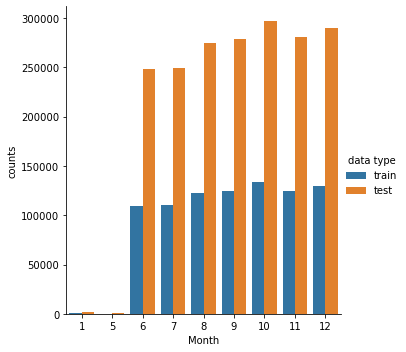

In [46]:
# count data by each month

# train data count
month_cnt = ds_train.groupby('Month').size().reset_index(name='train cnts')

# test data count
tmonth_cnt = ds_test.groupby('Month').size().reset_index(name='test cnts')

# merge both count results
df_month_cnt = pd.merge(month_cnt, tmonth_cnt, on='Month')

# pivot transform merge table for side by side plot
df_month_cnt2 = df_month_cnt.rename(columns={"train cnts": "train", "test cnts": "test"})
df_month_cnt2 = pd.melt(df_month_cnt2, id_vars='Month')
df_month_cnt2 = df_month_cnt2.rename(columns={"variable": "data type", "value": "counts"})

fig =plt.figure()
sns.factorplot(x='Month', y='counts', hue='data type', data=df_month_cnt2, kind='bar')
df_month_cnt

In [47]:
month_cnt

,Month,train cnts
0,1,825
1,5,175
2,6,109760
3,7,110750
4,8,122755
5,9,124686
6,10,133489
7,11,124739
8,12,129208


[Text(0, 0.5, 'total counts')]

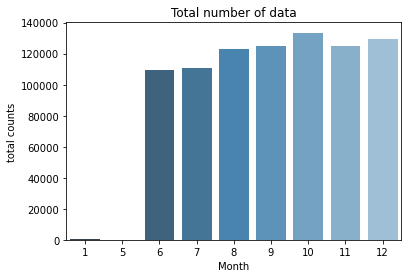

In [48]:
# graph count data by each month (train data sets only)
fig =plt.figure()
ax = sns.barplot(x='Month', y='train cnts', data=month_cnt, palette="Blues_d")
ax.set_title('Total number of data')
ax.set(ylabel='total counts')

[Observation] Data quality check:
- There aren't many data for January and May in the training sets.
- But test sets do not have many data for January and May either.
- There are unknown street names in both training and testing data sets

# Data Exploration

In [49]:
# list of cities
city_list = ds_train['City'].unique()
city_list

array(['Atlanta', 'Boston', 'Chicago', 'Philadelphia'], dtype=object)

[Observation]: 

There are 4 cities: Atlanta, Boston, Chicago and Philadelphia 

In [50]:
# number of train data for each city
ds_train.groupby('City').size().reset_index(name='counts')

,City,counts
0,Atlanta,156484
1,Boston,178617
2,Chicago,131049
3,Philadelphia,390237


In [51]:
# number of test data for each city
ds_test.groupby('City').size().reset_index(name='counts')

,City,counts
0,Atlanta,341852
1,Boston,409275
2,Chicago,298129
3,Philadelphia,872101


### Number of intersections in each city 

,City,intersection cnts
0,Atlanta,377
1,Boston,975
2,Chicago,2135
3,Philadelphia,1318


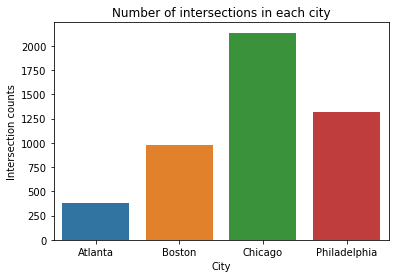

In [52]:
# count the number of intersections in each city
intersec_unique = ds_train[['City', 'IntersectionId']].drop_duplicates()
intersec_cnt = intersec_unique.groupby('City').size().reset_index(name='intersection cnts')

# plot and show count results
ax =sns.barplot(data=intersec_cnt, x='City', y='intersection cnts')
ax.set_title('Number of intersections in each city')
ax.set(ylabel='Intersection counts')
intersec_cnt

### average stop times, average time from first stop, average distance to first stop

In [53]:
# average stop times()
ds_st = ds_train[['City', 'TotalTimeStopped_p50']
                       ].groupby('City', as_index=False).mean().rename(columns={'TotalTimeStopped_p50':'mean stop time'})

# round to 2 decimal place
ds_st = ds_st.round(2)
ds_st

,City,mean stop time
0,Atlanta,9.74
1,Boston,8.60
2,Chicago,7.14
3,Philadelphia,6.71


In [54]:
# average time from first stop (sec)
ds_tffs = ds_train[['City', 'TimeFromFirstStop_p50']
                       ].groupby('City', as_index=False).mean().rename(columns=
                                                                       {'TimeFromFirstStop_p50':'mean time from first stop'})

# round to 2 decimal place
ds_tffs = ds_tffs.round(2)
ds_tffs

,City,mean time from first stop
0,Atlanta,15.23
1,Boston,13.23
2,Chicago,11.43
3,Philadelphia,11.92


In [55]:
# average distance to first stop (m)
ds_dtfs = ds_train[['City', 'DistanceToFirstStop_p50']
                       ].groupby('City', as_index=False).mean().rename(columns=
                                                                       {'DistanceToFirstStop_p50':'mean dist to first stop'})

# round to 2 decimal place
ds_dtfs = ds_dtfs.round(2)
ds_dtfs

,City,mean dist to first stop
0,Atlanta,30.86
1,Boston,23.46
2,Chicago,24.73
3,Philadelphia,31.87


[Observations] Average stop times and queue length: 
- City with longest stop times: Atlanta, waited 9.7s at intersections,Philadelphia has shortest stop
- City with longest queues at intersection: Philadelphia (31.87m), shortest is Boston (23.46m)
- Least intersections: Atlanta, most intersections: Chicago
- Most intersections = most traffic lights?

Summary:
- Philadelphia: second highest intersections (1318), longest queues at intersection, shortest stop times (6.71)
- Chicago: most intersections (2300++), one of the shortest queues at intersection, short stop times (7.14s)
- Atlanta: least intersections, second longest queues at intersection, longest stop time
- Boston: somewhere in between

### hourly traffic

In [56]:
ds_stoptime = ds_train[['City', 'Hour', 'Weekend', 'TotalTimeStopped_p80']]
ds_stoptime = ds_stoptime.groupby(['City', 'Hour', 'Weekend'], as_index=False).mean().rename(columns=
                                                                       {'TotalTimeStopped_p80':'avg stop time'})
ds_stoptime.head(5)

,City,Hour,Weekend,avg stop time
0,Atlanta,0,0,18.239805
1,Atlanta,0,1,22.566798
2,Atlanta,1,0,15.958213
3,Atlanta,1,1,20.642341
4,Atlanta,2,0,14.465867


Text(0.5, 0.98, 'Hourly average stop time on weekday')

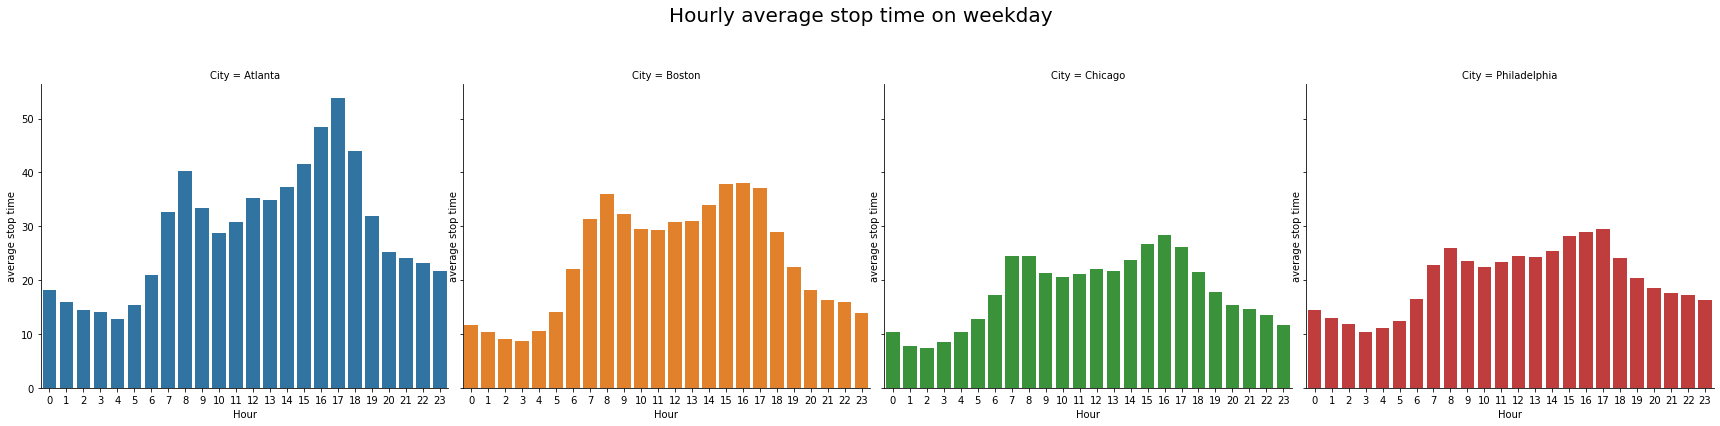

In [57]:
# weekdays and weekends
ds_stoptime_wkday = ds_stoptime[ds_stoptime['Weekend']==0]
ds_stoptime_wkend = ds_stoptime[ds_stoptime['Weekend']==1]

# plot weekdays
g = sns.FacetGrid(ds_stoptime_wkday, col="City", hue='City', height=6, aspect=1)
g.map(sns.barplot, "Hour", "avg stop time")
g.set(ylabel='average stop time')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Hourly average stop time on weekday', fontsize=20)

Observations
- There's 2 peaks in the morning and afternoon.
- Atlanta (least intersections) being the obvious 2 peaks and high waiting time
- Chicago and Philadelphia (high intersections) have almost equal traffics within the 2 peaks and low waiting time.
- The more intersection, the less traffic.

Text(0.5, 0.98, 'Hourly average stop time on weekend')

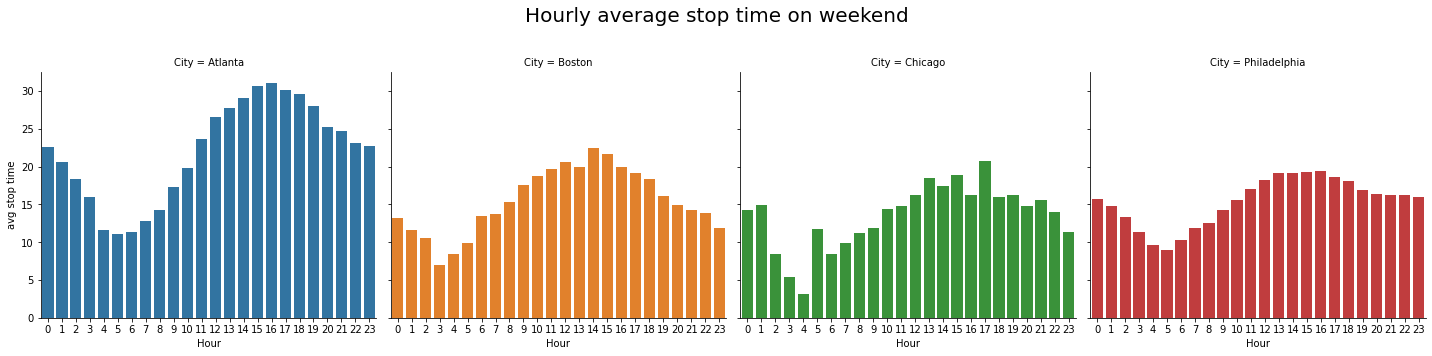

In [58]:
# plot weekends
g = sns.FacetGrid(ds_stoptime_wkend, col="City",hue='City', height=5, aspect=1)
g.map(sns.barplot, "Hour", "avg stop time")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Hourly average stop time on weekend', fontsize=20)

### Most congested intersection for each city 
- Find the most congested path in the training data
- Morning peak hour = 6,7,8,9
- Afternoon peak hour = 15,16,17,18,19

In [59]:
# get the data for morning peak and afternoon peak on weekdays
ds_stopTimeFull = ds_train[['City', 'Path', 'Hour', 'Weekend', 'TotalTimeStopped_p80']]
ds_stopTimeFull = ds_stopTimeFull[ds_stopTimeFull['Weekend'] == 0]
ds_morningPeak = ds_stopTimeFull[(ds_stopTimeFull['Hour'] >= 6) & (ds_stopTimeFull['Hour'] <= 9)]
ds_afternoonPeak = ds_stopTimeFull[(ds_stopTimeFull['Hour'] >= 15) & (ds_stopTimeFull['Hour'] <= 19)]

# get the average stop time for morning and afternoon peak by city and Path
ds_morningPeakG = ds_morningPeak.groupby(['City', 'Path'], as_index=False).mean().rename(columns=
                                                                       {'TotalTimeStopped_p80':'avg stop time'})
ds_afternoonPeakG = ds_afternoonPeak.groupby(['City', 'Path'], as_index=False).mean().rename(columns=
                                                                       {'TotalTimeStopped_p80':'avg stop time'})

# sort values
ds_morningPeakG = ds_morningPeakG.sort_values(by=['City', 'avg stop time'], ascending=False)
ds_afternoonPeakG = ds_afternoonPeakG.sort_values(by=['City', 'avg stop time'], ascending=False)

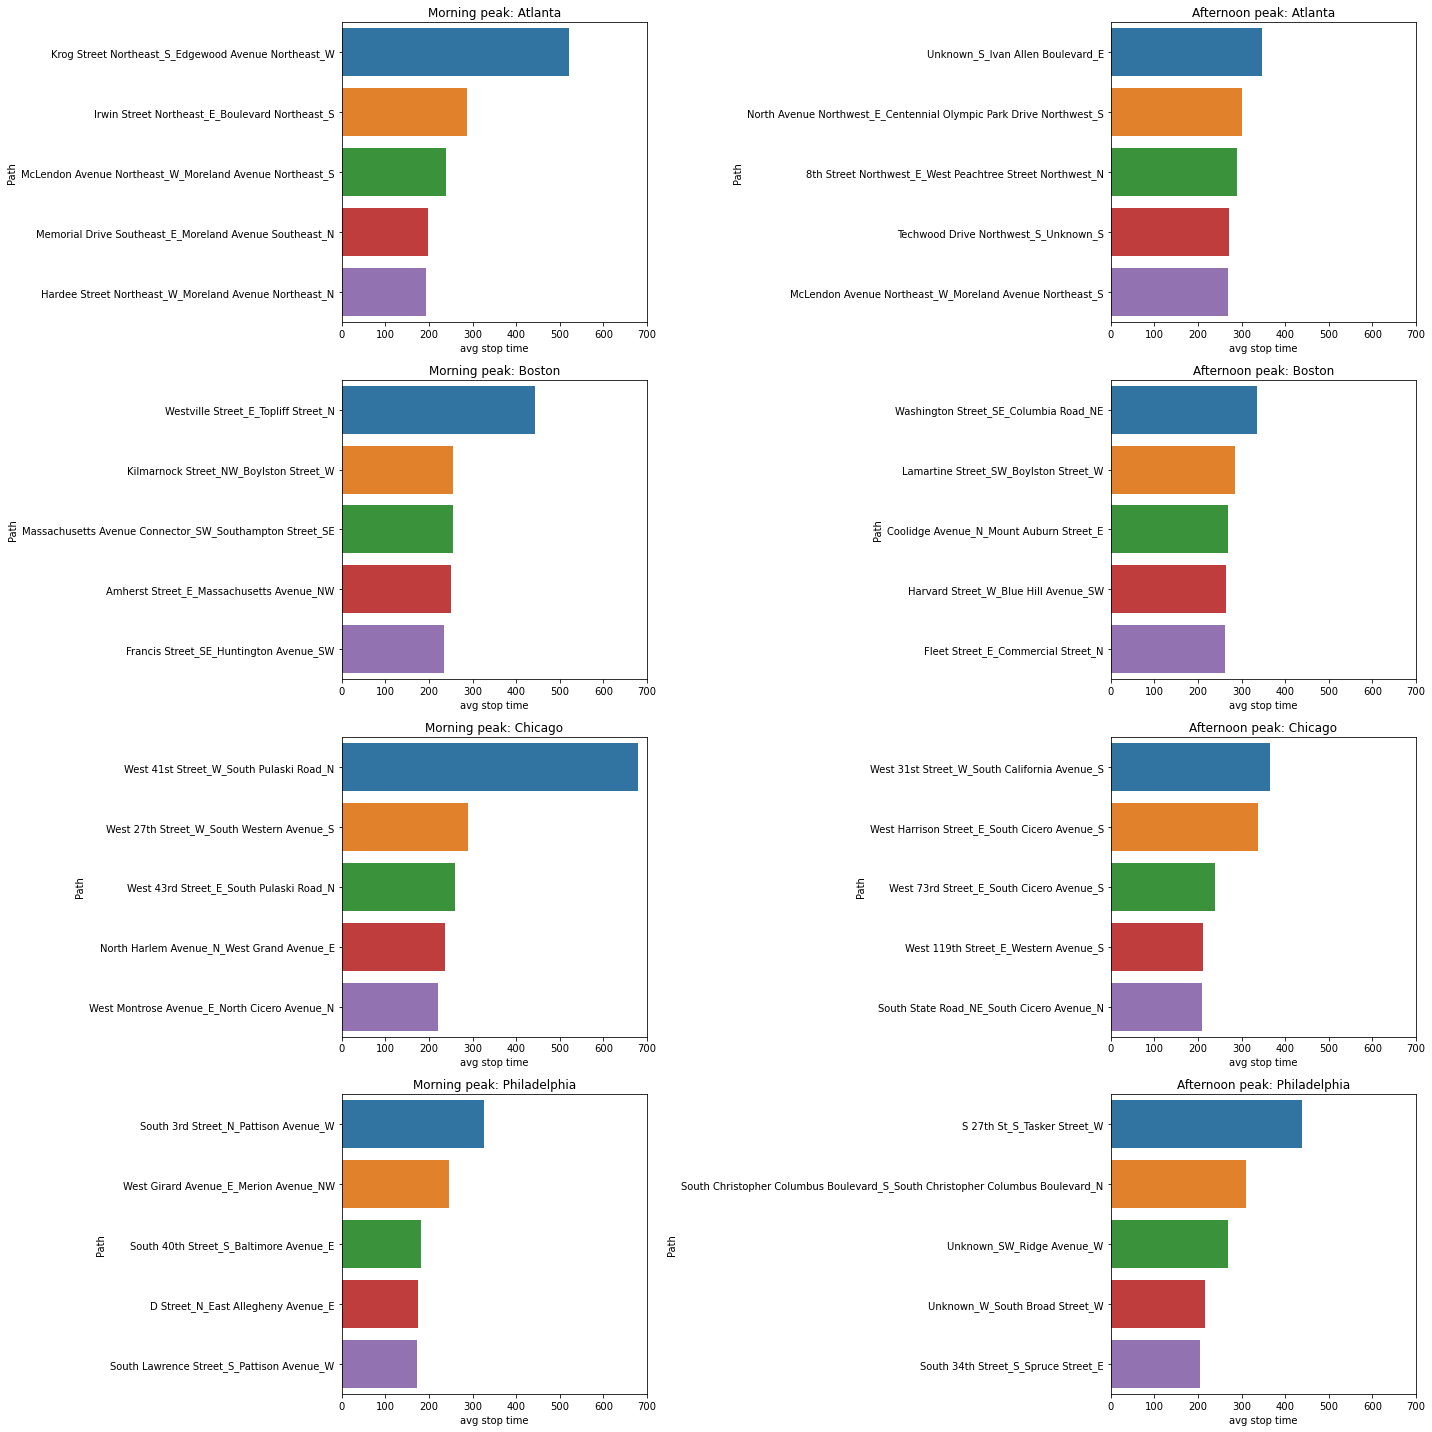

In [60]:
# plot top 5 most congested path for each city
fig, axes = plt.subplots(4,2, figsize=(20,20))
cnt = 0
for i, city in enumerate(city_list):
    morningPeak = ds_morningPeakG[ds_morningPeakG['City'] == city].head(5)
    afternoonPeak = ds_afternoonPeakG[ds_afternoonPeakG['City'] == city].head(5)
    
    sns.barplot(x ='avg stop time', y = 'Path', data=morningPeak, ax=axes[i,0])
    axes[i,0].set_title('Morning peak: %s' %city)
    
    sns.barplot(x ='avg stop time', y = 'Path', data=afternoonPeak, ax=axes[i,1])
    axes[i,1].set_title('Afternoon peak: %s' %city)
    
# same scale
plt.setp(axes, xlim=(0,700))
    
plt.tight_layout()
fig.show()

In [61]:
# Average stop time for morning and afternoon peak for each city
ds_morningPeakAvg = ds_morningPeak[['City', 'TotalTimeStopped_p80']].groupby(['City'], as_index=False).mean().rename(columns=
                                                                       {'TotalTimeStopped_p80':'Morning peak avg stop time'})

ds_afternoonPeakAvg = ds_afternoonPeak[['City', 'TotalTimeStopped_p80']].groupby(['City'], as_index=False).mean().rename(columns=
                                                                       {'TotalTimeStopped_p80':'Afternoon peak avg stop time'})

# merge both results by City
df_avgStopTime = pd.merge(ds_morningPeakAvg, ds_afternoonPeakAvg, on='City')

df_avgStopTime 

,City,Morning peak avg stop time,Afternoon peak avg stop time
0,Atlanta,32.848268,44.119358
1,Boston,30.937921,34.261277
2,Chicago,22.250946,25.315770
3,Philadelphia,22.719714,26.368697


[Observations] Most congested intersections from each city:
- All cities are more congested during afternoon peak hour as compare to morning peak hour
- Chicago's West 41st street and South Pulaski Road N is the most congested intersection in morning peak hour, on average, car stops for nearly 12 minutes (700 sec)
- Philadelphia's S 27th street S and Tasker street W is the most congested instersection in afternoon peak hour, on average, ca stops for 450sec 
- Atlanta
    - Morning peak: Krog Street S and Edgewood Avenue NW
    - Afternoon peak: Ivan Allen Boulevard E
    - On average, afternoon peak is much more congested than morning peak


- Boston
    - Morning peak: Westville street E and Topliff street N
    - Afternoon peak: Washington street SE and Columbia Road NE
    
- Chicago
    - Morning peak: West 41st street and South Pulaski Road N
    - Afternoon peak: West 31st street W and South California Avenue S

- Philadelphia
    - Morning peak: South 3rd street N and Pattinson Avenue W
    - Afternoon peak: S 27th street S and Tasker street W

### Visualise congestion intersection 

In [62]:
# create street name by intersection id
street_unique = ds_train[['City', 'IntersectionId', 'EntryStreetName']].drop_duplicates()

# remove NaN
street_unique = street_unique.dropna().reset_index()

# concatenate all street names
street_unique = street_unique.groupby(['City', 'IntersectionId'])['EntryStreetName'].apply(lambda x: ','.join(x)).reset_index()

# rename to StreetNames
street_unique = street_unique.rename(columns={"EntryStreetName": "StreetNames"})

# merge to train data sets
ds_train = pd.merge(ds_train, street_unique, on=['City', 'IntersectionId'])

In [63]:
# select a city
SEL_CITY = 'Boston'

In [64]:
# total time stopped
ds_totalTimeStopped=ds_train.groupby(['City','IntersectionId' ,'StreetNames', 'Latitude','Longitude'])['TotalTimeStopped_p50'].mean().reset_index()

# round to 2 decimal place
ds_totalTimeStopped.TotalTimeStopped_p50 = ds_totalTimeStopped.TotalTimeStopped_p50.round(2)

fig = px.scatter_mapbox(ds_totalTimeStopped[ds_totalTimeStopped["City"]==SEL_CITY], 
                        lat="Latitude", lon="Longitude",
                        size="TotalTimeStopped_p50",
                        size_max=12,
                        color="TotalTimeStopped_p50", 
                        color_continuous_scale=px.colors.sequential.Reds, zoom=11,
                        hover_data=["StreetNames","IntersectionId", "City", "TotalTimeStopped_p50"]
                       )

fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [65]:
# distance to first stop
ds_totalDistance=ds_train.groupby(['City','IntersectionId' ,'StreetNames', 'Latitude','Longitude'])['DistanceToFirstStop_p50'].mean().reset_index()

# round to 2 decimal place
ds_totalDistance.DistanceToFirstStop_p50 = ds_totalDistance.DistanceToFirstStop_p50.round(2)

fig = px.scatter_mapbox(ds_totalDistance[ds_totalDistance["City"]==SEL_CITY], 
                        lat="Latitude", lon="Longitude",
                        size="DistanceToFirstStop_p50",
                        size_max=12,
                        color="DistanceToFirstStop_p50", 
                        color_continuous_scale=px.colors.sequential.Reds, zoom=11,
                        hover_data=["StreetNames","IntersectionId", "City", "DistanceToFirstStop_p50"]
                       )

fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

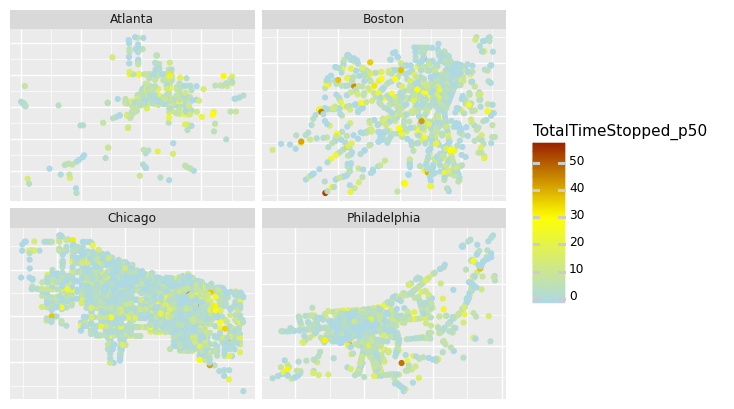

<ggplot: (188997598163)>

In [66]:
# plot using ggplot
from plotnine import *

# plot all four cities
ggplot(ds_totalTimeStopped, aes(x='Latitude', y='Longitude', colour = 'TotalTimeStopped_p50') ) + \
geom_point() + scale_colour_gradient2(low = "lightblue", mid = "yellow", high = "darkred", midpoint = 30) + \
facet_wrap('City', scales = "free") + \
theme(axis_title_x = element_blank(), axis_title_y = element_blank(), 
      axis_text_x = element_blank(), axis_text_y = element_blank(),
      axis_ticks_major_x = element_blank(), axis_ticks_major_y = element_blank())

[Observations]

- Based on the visual map for the total time stopped, intersections that have level crossings, tram tracks and pedestrian crossings tend to have long waiting time.
- Only a few streets have extremely high cases of congestion

## Summary and Next step

Atlanta had the least number of intersections, but they also have the longest waiting times overall, during morning peak and afternoon peak, and has the second longest queue on average. Based on these results, there is a high chance that roads with least number of intersections may result in more traffic congestion in the city. 

Further analysis on the traffic patterns would still be required to fully understand the transport demand before we begin building the prediction model.


Actions for further analaysis:
1. Investigate whether the following features will affect the traffic:
    - road type (ie: road, street, lane, avenue)
    - turning direction (ie: NW, NE, SW, SE)
2. Analyse monthly weather data for each city. Rain, snow and fog are known to have impact on traffic operations.